# Twitter Data Analysis of WeRateDogs Archive
# By Divya Nitin Naidu
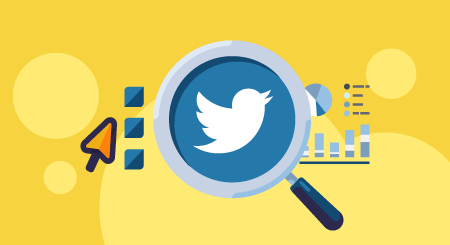

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import tweepy
import requests
import json
from PIL import Image
from io import BytesIO

# Gathering the Data

1. The WeRateDogs Twitter archive

In [2]:
#The provided csv file of WeRateDogs
df_tw=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_tw.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [4]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Tweet Image Predictions

In [93]:
#Image predictions File downloaded programmatically using the Requests library 
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
#response.content
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [94]:
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')

In [95]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Twitter API - JSON File

I have used the below site as referral for creating the dataframe using twitter data 
https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [8]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [9]:
# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in df_tw['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 735
Rate limit reached. Sleeping for: 720


In [10]:
#Isolating the json part of each tweepy status object that we have downloaded and adding them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

In [11]:
#we write this list into a txt file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [12]:
#create a DataFrame from the tweet_json.txt file
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

In [13]:
tweet_json.head()

tweet_id  favorite_count  retweet_count  \
0  892420643555336193           36127           7692   
1  892177421306343426           31161           5689   
2  891815181378084864           23474           3774   
3  891689557279858688           39412           7858   
4  891327558926688256           37636           8467   

                       created_at              source retweeted_status  \
0  Tue Aug 01 16:23:56 +0000 2017  Twitter for iPhone   Original tweet   
1  Tue Aug 01 00:17:27 +0000 2017  Twitter for iPhone   Original tweet   
2  Mon Jul 31 00:18:03 +0000 2017  Twitter for iPhone   Original tweet   
3  Sun Jul 30 15:58:51 +0000 2017  Twitter for iPhone   Original tweet   
4  Sat Jul 29 16:00:24 +0000 2017  Twitter for iPhone   Original tweet   

                       url  
0  https://t.co/MgUWQ76dJU  
1  https://t.co/aQFSeaCu9L  
2  https://t.co/r0YlrsGCgy  
3  https://t.co/tD36da7qLQ  
4  https://t.co/0g0KMIVXZ3

In [14]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   created_at        2331 non-null   object
 4   source            2331 non-null   object
 5   retweeted_status  2331 non-null   object
 6   url               2331 non-null   object
dtypes: int64(2), object(5)
memory usage: 127.6+ KB


# Assessing Data

## Visual Assessment
  We will view all the three data that we have gathered above and assess them for Tidiness and Quality issues.

1. Twitter Archive WeRateDogs

In [16]:
df_tw

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

2. Tweet Image Predictions

In [17]:
image_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

3. The Tweet JSON

In [18]:
tweet_json

tweet_id  favorite_count  retweet_count  \
0     892420643555336193           36127           7692   
1     892177421306343426           31161           5689   
2     891815181378084864           23474           3774   
3     891689557279858688           39412           7858   
4     891327558926688256           37636           8467   
...                  ...             ...            ...   
2326  666049248165822465              96             40   
2327  666044226329800704             272            131   
2328  666033412701032449             112             41   
2329  666029285002620928             121             42   
2330  666020888022790149            2410            460   

                          created_at              source retweeted_status  \
0     Tue Aug 01 16:23:56 +0000 2017  Twitter for iPhone   Original tweet   
1     Tue Aug 01 00:17:27 +0000 2017  Twitter for iPhone   Original tweet   
2     Mon Jul 31 00:18:03 +0000 2017  Twitter for iPhone   Original tweet   
3     Sun Jul 30 15:58:51 +0000 2017  Twitter for iPhone   Original tweet   
4     Sat Jul 29 16:00:24 +0000 2017  Twitter for iPhone   Original tweet   
...                              ...                 ...              ...   
2326  Mon Nov 16 00:24:50 +0000 2015  Twitter for iPhone   Original tweet   
2327  Mon Nov 16 00:04:52 +0000 2015  Twitter for iPhone   Original tweet   
2328  Sun Nov 15 23:21:54 +0000 2015  Twitter for iPhone   Original tweet   
2329  Sun Nov 15 23:05:30 +0000 2015  Twitter for iPhone   Original tweet   
2330  Sun Nov 15 22:32:08 +0000 2015  Twitter for iPhone   Original tweet   

                          url  
0     https://t.co/MgUWQ76dJU  
1     https://t.co/aQFSeaCu9L  
2     https://t.co/r0YlrsGCgy  
3     https://t.co/tD36da7qLQ  
4     https://t.co/0g0KMIVXZ3  
...                       ...  
2326  https://t.co/4B7cOc1EDq  
2327  https://t.co/DWnyCjf2mx  
2328  https://t.co/y671yMhoiR  
2329  https://t.co/r7mOb2m0UI  
2330  https://t.co/BLDqew2Ijj  

[2331 rows x 7 columns]

## Programmatic Assessment
  Assesing all three gathered data using different Pandas Functions

1. Twitter Archive WeRateDogs

In [28]:
df_tw.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2220  668484198282485761                    NaN                  NaN   
625   795400264262053889                    NaN                  NaN   
1455  695409464418041856                    NaN                  NaN   
280   839549326359670784                    NaN                  NaN   
2132  670079681849372674                    NaN                  NaN   
1812  676811746707918848                    NaN                  NaN   
222   849668094696017920                    NaN                  NaN   
1177  719704490224398336                    NaN                  NaN   
2149  669684865554620416           6.693544e+17         4.196984e+09   
1179  719367763014393856                    NaN                  NaN   

                      timestamp  \
2220  2015-11-22 17:40:27 +0000   
625   2016-11-06 22:59:35 +0000   
1455  2016-02-05 00:51:51 +0000   
280   2017-03-08 18:52:12 +0000   
2132  2015-11-27 03:20:20 +0000   
1812  2015-12-15 17:11:09 +0000   
222   2017-04-05 17:00:34 +0000   
1177  2016-04-12 01:51:36 +0000   
2149  2015-11-26 01:11:28 +0000   
1179  2016-04-11 03:33:34 +0000   

                                                 source  \
2220  <a href="http://twitter.com/download/iphone" r...   
625   <a href="http://twitter.com/download/iphone" r...   
1455  <a href="http://twitter.com/download/iphone" r...   
280   <a href="http://twitter.com/download/iphone" r...   
2132  <a href="http://twitter.com/download/iphone" r...   
1812  <a href="http://twitter.com/download/iphone" r...   
222   <a href="http://twitter.com/download/iphone" r...   
1177  <a href="http://twitter.com/download/iphone" r...   
2149  <a href="http://twitter.com/download/iphone" r...   
1179  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2220  Good teamwork between these dogs. One is on lo...                  NaN   
625   This is Brody. He's trying to make the same fa...                  NaN   
1455  This is Bob. He just got back from his job int...                  NaN   
280   Meet Winston. He knows he's a little too big f...                  NaN   
2132  Meet Fabio. He's a wonderful pup. Can't stay a...                  NaN   
1812  Say hello to Penny &amp; Gizmo. They are pract...                  NaN   
222   RT @dog_rates: This is Gidget. She's a spy pup...         8.331247e+17   
1177  This is Clyde. He's making sure you're having ...                  NaN   
2149  After countless hours of research and hundreds...                  NaN   
1179  Meet Sid &amp; Murphy. Murphy floats alongside...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2220                       NaN                        NaN   
625                        NaN                        NaN   
1455                       NaN                        NaN   
280                        NaN                        NaN   
2132                       NaN                        NaN   
1812                       NaN                        NaN   
222               4.196984e+09  2017-02-19 01:23:00 +0000   
1177                       NaN                        NaN   
2149                       NaN                        NaN   
1179                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2220  https://twitter.com/dog_rates/status/668484198...                 9   
625   https://twitter.com/dog_rates/status/795400264...                12   
1455  https://twitter.com/dog_rates/status/695409464...                10   
280   https://twitter.com/dog_rates/status/839549326...                12   
2132  https://twitter.com/dog_rates/status/670079681...                10   
1812  https://twitter.com/dog_rates/status/676811746...                 9   
222   https://twitter.com/dog_rates/status/833124694...                12   
1177  https://twit

In [19]:
#View info
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
# View descriptive statistics
df_tw.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [21]:
#Check for Duplicate data
sum(df_tw.duplicated())

0

In [22]:
# total missing values for each features
df_tw.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [23]:
df_tw.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

10 is the standard rating_denominator, other numbers need to be corrected if they were wrongly interpreted.

In [24]:
df_tw.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Some extreme values such as 960, 1776 could be errors

In [25]:
df_tw.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Main source is iphone but the urls are not readable we could use this to analyze in the later.

2. Image Predictions

In [27]:
image_predictions.sample(10)

tweet_id                                            jpg_url  \
1528  789137962068021249    https://pbs.twimg.com/media/CvOUw8vWYAAzJDq.jpg   
1645  808134635716833280    https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg   
1848  839549326359670784    https://pbs.twimg.com/media/C6atpTLWYAIL7bU.jpg   
1381  765371061932261376    https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg   
1162  734912297295085568    https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg   
740   687312378585812992    https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg   
1743  822859134160621569    https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg   
1471  779377524342161408  https://pbs.twimg.com/ext_tw_video_thumb/77937...   
1717  819015331746349057    https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg   
432   674291837063053312    https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
1528        2         Chihuahua  0.746135    True            Pekinese   
1645        1    cocker_spaniel  0.740220    True      Dandie_Dinmont   
1848        1             swing  0.393527   False     Norwich_terrier   
1381        2  golden_retriever  0.829456    True  Labrador_retriever   
1162        1       Maltese_dog  0.847292    True         feather_boa   
740         1         seat_belt  0.703561   False          Great_Dane   
1743        1          malinois  0.332897    True           Chihuahua   
1471        1           sundial  0.170921   False        cash_machine   
1717        4            prison  0.907083   False              palace   
432         1          Cardigan  0.611525    True            Pembroke   

       p2_conf  p2_dog                         p3   p3_conf  p3_dog  
1528  0.070383    True                   Pembroke  0.049237    True  
1645  0.061604    True             English_setter  0.041331    True  
1848  0.052480    True                   Pembroke  0.049901    True  
1381  0.089371    True                     kuvasz  0.017028    True  
1162  0.059379   False       Old_English_sheepdog  0.052758    True  
740   0.139909    True                 Weimaraner  0.021112    True  
1743  0.104116    True  Staffordshire_bullterrier  0.047745    True  
1471  0.060359   False                       maze  0.054981   False  
1717  0.020089   False                   umbrella  0.007850   False  
432   0.368566    True                  Chihuahua  0.003330    True

In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [33]:
#Check duplicates in jpg_url as same url means duplicated data
sum(image_predictions.jpg_url.duplicated())

66

In [32]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [36]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [37]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

3. Tweet JSON

In [38]:
tweet_json.sample(10)

tweet_id  favorite_count  retweet_count  \
1824  675781562965868544            1593            454   
1366  700151421916807169            2227            668   
2017  671538301157904385             896            371   
530   805520635690676224            5846           1687   
237   845677943972139009           24940           4733   
62    879862464715927552           20962           3188   
1425  696100768806522880            1921            650   
892   757354760399941633            4531           1430   
419   820446719150292993               0           2601   
1813  675898130735476737            1574            558   

                          created_at               source   retweeted_status  \
1824  Sat Dec 12 20:57:34 +0000 2015   Twitter for iPhone     Original tweet   
1366  Thu Feb 18 02:54:41 +0000 2016   Twitter for iPhone     Original tweet   
2017  Tue Dec 01 03:56:22 +0000 2015   Twitter for iPhone     Original tweet   
530   Sun Dec 04 21:14:20 +0000 2016   Twitter for iPhone     Original tweet   
237   Sat Mar 25 16:45:08 +0000 2017   Twitter for iPhone     Original tweet   
62    Wed Jun 28 00:42:13 +0000 2017   Twitter for iPhone     Original tweet   
1425  Sat Feb 06 22:38:50 +0000 2016  Vine - Make a Scene     Original tweet   
892   Sun Jul 24 23:20:20 +0000 2016   Twitter for iPhone     Original tweet   
419   Sun Jan 15 01:45:15 +0000 2017   Twitter for iPhone  This is a retweet   
1813  Sun Dec 13 04:40:46 +0000 2015   Twitter for iPhone     Original tweet   

                          url  
1824  https://t.co/DVAqAnb624  
1366  https://t.co/o9aJVPB25n  
2017  https://t.co/fUuiyu2QTD  
530   https://t.co/WNdOIm4bXy  
237   https://t.co/R6xQ5n19T3  
62    https://t.co/Qh5aEkRQm9  
1425  https://t.co/7ODQWHwYDx  
892   https://t.co/7waRPODGyO  
419         This is a retweet  
1813  https://t.co/G0pQiFGM7O

In [39]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   created_at        2331 non-null   object
 4   source            2331 non-null   object
 5   retweeted_status  2331 non-null   object
 6   url               2331 non-null   object
dtypes: int64(2), object(5)
memory usage: 127.6+ KB


In [43]:
sum(tweet_json.duplicated())

0

In [44]:
tweet_json.isnull().sum()

tweet_id            0
favorite_count      0
retweet_count       0
created_at          0
source              0
retweeted_status    0
url                 0
dtype: int64

In [40]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [41]:
tweet_json.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [42]:
# Top 5 retweet_count records
tweet_json.sort_values(['retweet_count'], ascending= 0)[0:5]

tweet_id  favorite_count  retweet_count  \
1015  744234799360020481          155784          77642   
1055  739238157791694849          115101          57595   
517   807106840509214720          120339          56601   
397   822872901745569793          132768          43729   
65    879415818425184262           99028          40535   

                          created_at              source retweeted_status  \
1015  Sat Jun 18 18:26:18 +0000 2016  Twitter for iPhone   Original tweet   
1055  Sat Jun 04 23:31:25 +0000 2016  Twitter for iPhone   Original tweet   
517   Fri Dec 09 06:17:20 +0000 2016  Twitter for iPhone   Original tweet   
397   Sat Jan 21 18:26:02 +0000 2017  Twitter for iPhone   Original tweet   
65    Mon Jun 26 19:07:24 +0000 2017  Twitter for iPhone   Original tweet   

                          url  
1015  https://t.co/7wE9LTEXC4  
1055  https://t.co/YcXgHfp1EC  
517   https://t.co/DkBYaCAg2d  
397   https://t.co/nTz3FtorBc  
65    https://t.co/UDT7ZkcTgY

In [45]:
# Top 5 favorite_count records
tweet_json.sort_values(['favorite_count'], ascending= 0)[0:5]

tweet_id  favorite_count  retweet_count  \
1015  744234799360020481          155784          77642   
397   822872901745569793          132768          43729   
517   807106840509214720          120339          56601   
129   866450705531457537          116190          32888   
1055  739238157791694849          115101          57595   

                          created_at              source retweeted_status  \
1015  Sat Jun 18 18:26:18 +0000 2016  Twitter for iPhone   Original tweet   
397   Sat Jan 21 18:26:02 +0000 2017  Twitter for iPhone   Original tweet   
517   Fri Dec 09 06:17:20 +0000 2016  Twitter for iPhone   Original tweet   
129   Mon May 22 00:28:40 +0000 2017  Twitter for iPhone   Original tweet   
1055  Sat Jun 04 23:31:25 +0000 2016  Twitter for iPhone   Original tweet   

                          url  
1015  https://t.co/7wE9LTEXC4  
397   https://t.co/nTz3FtorBc  
517   https://t.co/DkBYaCAg2d  
129   https://t.co/wk7TfysWHr  
1055  https://t.co/YcXgHfp1EC

# Cleaning Plan Summary
## Tidiness Issues

Twitter Archive WeRateDogs
- Columns 'doggo', 'floofer', 'pupper', 'puppo' in df_tw should be a single column stage
- Change tweet_id to type int64 in order to merge with the other 2 tables

Tweet JSON
- Join 'tweet_json' and 'image_predictions' to 'df_tw'

## Quality Issues

Twitter Archive WeRateDogs
- Delete columns that won't be used for analysis
- The datatype of "timestamp" is not correct.
- The standard for "rating_denominator" is 10 correct the same.
- The "rating_numerator" also has some incorrect values.
- The dog names format should be consistent. Make the first letter capital for all the names.

Image Predictions
- Drop duplicate values from jpg_url
- The column names such as p1,p2 are not decriptive.
- The prediction dog breeds involve both uppercase and lowercase for the first letter.

Tweet JSON
- Delete columns that won't be used for analysis

## Tidiness

### Columns 'doggo', 'floofer', 'pupper', 'puppo' in df_tw should be a single column stage

### Code

In [46]:
# make copies for cleaning
df_tw_clean = df_tw.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

In [49]:
# use a for loop to replace all the 'None' before cat
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        df_tw_clean[i] = df_tw_clean[i].replace('None', '')

In [50]:
# use cat to combine 
df_tw_clean['stage'] = df_tw_clean.doggo.str.cat(df_tw_clean.floofer).str.cat(df_tw_clean.pupper).str.cat(df_tw_clean.puppo)

# drop the four old colomns
df_tw_clean = df_tw_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
df_tw_clean['stage'] = df_tw_clean['stage'].replace('', np.nan)

### Test

In [53]:
df_tw_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2041  671542985629241344                    NaN                  NaN   
305   836260088725786625                    NaN                  NaN   
1647  683828599284170753                    NaN                  NaN   
1559  688547210804498433                    NaN                  NaN   
1397  699779630832685056                    NaN                  NaN   

                      timestamp  \
2041  2015-12-01 04:14:59 +0000   
305   2017-02-27 17:01:56 +0000   
1647  2016-01-04 01:53:37 +0000   
1559  2016-01-17 02:23:42 +0000   
1397  2016-02-17 02:17:19 +0000   

                                                 source  \
2041  <a href="http://twitter.com/download/iphone" r...   
305   <a href="http://twitter.com/download/iphone" r...   
1647  <a href="http://twitter.com/download/iphone" r...   
1559  <a href="http://twitter.com/download/iphone" r...   
1397  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2041  This is JD (stands for "just dog"). He's like ...                  NaN   
305   This is Lucy. She spent all morning overseeing...                  NaN   
1647  Breathtaking pupper here. Should be on the cov...                  NaN   
1559  This is Frönq. He got caught stealing a waffle...                  NaN   
1397   Take all my money. 10/10 https://t.co/B28ebc5LzQ                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2041                       NaN                        NaN   
305                        NaN                        NaN   
1647                       NaN                        NaN   
1559                       NaN                        NaN   
1397                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2041  https://twitter.com/dog_rates/status/671542985...                10   
305   https://twitter.com/dog_rates/status/836260088...                13   
1647  https://twitter.com/dog_rates/status/683828599...                12   
1559  https://twitter.com/dog_rates/status/688547210...                 9   
1397  https://twitter.com/dog_rates/status/699779630...                10   

      rating_denominator   name   stage  
2041                  10     JD     NaN  
305                   10   Lucy     NaN  
1647                  10   None  pupper  
1559                  10  Frönq     NaN  
1397                  10   None     NaN

### Change tweet_id to type int64 in order to merge with the other 2 tables

### Code

In [61]:
tweet_json_clean['tweet_id']= pd.to_numeric(tweet_json_clean['tweet_id'])

### Test

In [62]:
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

## Quality Issues

### Twitter Archive WeRateDogs
### Delete columns that won't be used for analysis

### Code

In [63]:
df_tw_clean = df_tw_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

### Test

In [64]:
df_tw_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name stage  
0                  10   Phineas   NaN  
1                  10     Tilly   NaN  
2                  10    Archie   NaN  
3                  10     Darla   NaN  
4                  10  Franklin   NaN

### The datatype of "timestamp" is not correct
### Code

In [65]:
df_tw_clean['timestamp'] = pd.to_datetime(df_tw_clean['timestamp'])

### Test

In [67]:
df_tw_clean.timestamp.dtypes

datetime64[ns, UTC]

### The standard for "rating_denominator" is 10, correcting the rating_denominator as per the text.
### Code

In [69]:
temp_df = df_tw_clean[df_tw_clean['rating_denominator'] != 10]
temp_df[['tweet_id','text','rating_numerator','rating_denominator']]

tweet_id                                               text  \
313   835246439529840640  @jonnysun @Lin_Manuel ok jomny I know you're e...   
342   832088576586297345           @docmisterio account started on 11/15/15   
433   820690176645140481  The floofs have been released I repeat the flo...   
516   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
784   775096608509886464  RT @dog_rates: After so many requests, this is...   
902   758467244762497024  Why does this never happen at my front door......   
1068  740373189193256964  After so many requests, this is Bretagne. She ...   
1120  731156023742988288  Say hello to this unbelievably well behaved sq...   
1165  722974582966214656  Happy 4/20 from the squad! 13/10 for all https...   
1202  716439118184652801  This is Bluebert. He just saw that both #Final...   
1228  713900603437621249  Happy Saturday here's 9 puppers on a bench. 99...   
1254  710658690886586372  Here's a brigade of puppers. All look very pre...   
1274  709198395643068416  From left to right:\nCletus, Jerome, Alejandro...   
1351  704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
1433  697463031882764288  Happy Wednesday here's a bucket of pups. 44/40...   
1598  686035780142297088  Yes I do realize a rating of 4/20 would've bee...   
1634  684225744407494656  Two sneaky puppers were not initially seen, mo...   
1635  684222868335505415  Someone help the girl is being mugged. Several...   
1662  682962037429899265  This is Darrel. He just robbed a 7/11 and is i...   
1663  682808988178739200  I'm aware that I could've said 20/16, but here...   
1779  677716515794329600  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1843  675853064436391936  Here we have an entire platoon of puppers. Tot...   
2335  666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   

      rating_numerator  rating_denominator  
313                960                   0  
342                 11                  15  
433                 84                  70  
516                 24                   7  
784                  9                  11  
902                165                 150  
1068                 9                  11  
1120               204                 170  
1165                 4                  20  
1202                50                  50  
1228                99                  90  
1254                80                  80  
1274                45                  50  
1351                60                  50  
1433                44                  40  
1598                 4                  20  
1634               143                 130  
1635               121                 110  
1662                 7                  11  
1663                20                  16  
1779               144                 120  
1843                88                  80  
2335                 1                   2

The tweet_id 740373189193256964 ,722974582966214656,716439118184652801,682962037429899265,666287406224695296 have actual denominator as 10, but was analyzed incorrectly due to the presence of another fraction in the text.

In [71]:
df_tw_clean.loc[df_tw_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
df_tw_clean.loc[df_tw_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
df_tw_clean.loc[df_tw_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
df_tw_clean.loc[df_tw_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
df_tw_clean.loc[df_tw_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

### Test

In [75]:
print(df_tw_clean.loc[df_tw_clean.tweet_id == 740373189193256964])
print(df_tw_clean.loc[df_tw_clean.tweet_id == 722974582966214656])

                tweet_id                 timestamp  \
1068  740373189193256964 2016-06-08 02:41:38+00:00   

                                                   text  rating_numerator  \
1068  After so many requests, this is Bretagne. She ...                 9   

      rating_denominator  name stage  
1068                  10  None   NaN  
                tweet_id                 timestamp  \
1165  722974582966214656 2016-04-21 02:25:47+00:00   

                                                   text  rating_numerator  \
1165  Happy 4/20 from the squad! 13/10 for all https...                 4   

      rating_denominator  name stage  
1165                  10  None   NaN  


### The "rating_numerator" also has some incorrect values
### Code

Correcting the numerator of the tweet_id whose denominator we corrected above 

In [76]:
df_tw_clean.loc[df_tw_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
df_tw_clean.loc[df_tw_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
df_tw_clean.loc[df_tw_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
df_tw_clean.loc[df_tw_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
df_tw_clean.loc[df_tw_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9

### Test

In [77]:
print(df_tw_clean.loc[df_tw_clean.tweet_id == 740373189193256964])
print(df_tw_clean.loc[df_tw_clean.tweet_id == 722974582966214656])

                tweet_id                 timestamp  \
1068  740373189193256964 2016-06-08 02:41:38+00:00   

                                                   text  rating_numerator  \
1068  After so many requests, this is Bretagne. She ...                14   

      rating_denominator  name stage  
1068                  10  None   NaN  
                tweet_id                 timestamp  \
1165  722974582966214656 2016-04-21 02:25:47+00:00   

                                                   text  rating_numerator  \
1165  Happy 4/20 from the squad! 13/10 for all https...                13   

      rating_denominator  name stage  
1165                  10  None   NaN  


### The dog names format should be consistent. Make the first letter capital for all the names
### Code

In [78]:
df_tw_clean['name'].str.islower().sum()

109

In [79]:
df_tw_clean['name'] = df_tw_clean.name.str.capitalize()

### Test

In [80]:
df_tw_clean['name'].str.islower().sum()

0

In [81]:
df_tw_clean['name'].head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

### Image Predictions
### Drop duplicate values from jpg_url
### Code

In [82]:
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='first')

### Test

In [84]:
sum(image_predictions_clean['jpg_url'].duplicated())

0

### The column names are not clear and straightforward such as p1,p2
### Code

In [88]:
image_predictions_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

C:\Users\divya\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Test

In [89]:
image_predictions_clean.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num        first_prediction  first_confidence  first_dog  \
0        1  Welsh_springer_spaniel          0.465074       True   
1        1                 redbone          0.506826       True   

    second_prediction  second_confidence  second_dog     third_prediction  \
0              collie           0.156665        True    Shetland_sheepdog   
1  miniature_pinscher           0.074192        True  Rhodesian_ridgeback   

   third_confidence  third_dog  
0          0.061428       True  
1          0.072010       True

### The prediction dog breeds involve both uppercase and lowercase for the first letter
### Code

In [98]:
image_predictions_clean['first_prediction'] = image_predictions_clean.first_prediction.str.capitalize()
image_predictions_clean['second_prediction'] = image_predictions_clean.second_prediction.str.capitalize()
image_predictions_clean['third_prediction'] = image_predictions_clean.third_prediction.str.capitalize();

C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

### Test

In [96]:
image_predictions_clean.first_prediction.value_counts().head()

Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    55
Name: first_prediction, dtype: int64

### Tweet JSON
### Delete columns that won't be used for analysis
### Code

In [99]:
tweet_json_clean.head()

tweet_id  favorite_count  retweet_count  \
0  892420643555336193           36127           7692   
1  892177421306343426           31161           5689   
2  891815181378084864           23474           3774   
3  891689557279858688           39412           7858   
4  891327558926688256           37636           8467   

                       created_at              source retweeted_status  \
0  Tue Aug 01 16:23:56 +0000 2017  Twitter for iPhone   Original tweet   
1  Tue Aug 01 00:17:27 +0000 2017  Twitter for iPhone   Original tweet   
2  Mon Jul 31 00:18:03 +0000 2017  Twitter for iPhone   Original tweet   
3  Sun Jul 30 15:58:51 +0000 2017  Twitter for iPhone   Original tweet   
4  Sat Jul 29 16:00:24 +0000 2017  Twitter for iPhone   Original tweet   

                       url  
0  https://t.co/MgUWQ76dJU  
1  https://t.co/aQFSeaCu9L  
2  https://t.co/r0YlrsGCgy  
3  https://t.co/tD36da7qLQ  
4  https://t.co/0g0KMIVXZ3

In [100]:
tweet_json_clean=tweet_json_clean.drop(['created_at','source','retweeted_status','url'],1)

In [101]:
tweet_json_clean.head()

tweet_id  favorite_count  retweet_count
0  892420643555336193           36127           7692
1  892177421306343426           31161           5689
2  891815181378084864           23474           3774
3  891689557279858688           39412           7858
4  891327558926688256           37636           8467

## Join 'tweet_json' and 'image_predictions' to 'df_tw'

In [102]:
#image_prediction_clean to df_tw
twitter1 = pd.merge(df_tw_clean, 
                      image_predictions_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
twitter1 = twitter1[twitter1['jpg_url'].notnull()]

In [103]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2009 non-null   int64              
 1   timestamp           2009 non-null   datetime64[ns, UTC]
 2   text                2009 non-null   object             
 3   rating_numerator    2009 non-null   int64              
 4   rating_denominator  2009 non-null   int64              
 5   name                2009 non-null   object             
 6   stage               310 non-null    object             
 7   jpg_url             2009 non-null   object             
 8   img_num             2009 non-null   float64            
 9   first_prediction    2009 non-null   object             
 10  first_confidence    2009 non-null   float64            
 11  first_dog           2009 non-null   object             
 12  second_prediction   2009 non-null 

In [104]:
twitter = pd.merge(twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

In [105]:
twitter.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name stage  \
0                  10   Phineas   NaN   
1                  10     Tilly   NaN   
2                  10    Archie   NaN   
3                  10     Darla   NaN   
4                  10  Franklin   NaN   

                                           jpg_url  img_num first_prediction  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0           Orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0        Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0        Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0      Paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0           Basset   

   first_confidence first_dog   second_prediction  second_confidence  \
0          0.097049     False               Bagel           0.085851   
1          0.323581      True            Pekinese           0.090647   
2          0.716012      True            Malamute           0.078253   
3          0.170278     False  Labrador_retriever           0.168086   
4          0.555712      True    English_springer           0.225770   

  second_dog             third_prediction  third_confidence third_dog  \
0      False                       Banana          0.076110     False   
1       True                     Papillon          0.068957      True   
2       True                       Kelpie          0.031379      True   
3       True                      Spatula          0.040836     False   
4       True  German_short-haired_pointer          0.175219      True   

   favorite_count  retweet_count  
0         36127.0         7692.0  
1         31161.0         5689.0  
2         23474.0         3774.0  
3         39412.0         7858.0  
4         37636.0         8467.0

# Storing the Data

In [106]:
#Store the clean DataFrame in a CSV file
twitter.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

# Analyzing and Visualizing Data

## Most Popular Dog Breeds

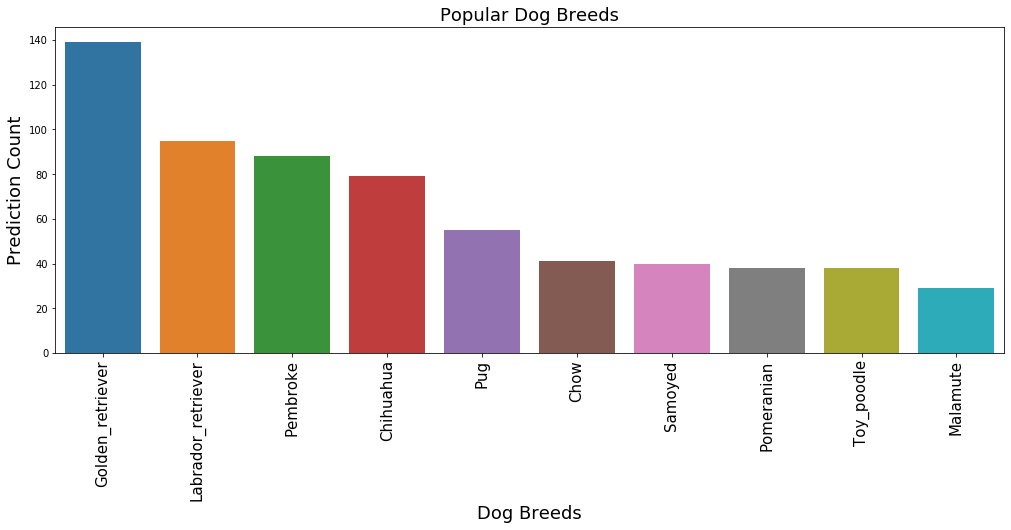

In [150]:
plt.figure(figsize = (17,6))
ax = sb.barplot(x = twitter['first_prediction'].value_counts()[0:10].index,
            y =twitter['first_prediction'].value_counts()[0:10],
            data = twitter);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18);

## Top 5 Counts of Most Popular dog breed - Golden Retriever

In [114]:
golden_retriever_df = twitter.query('first_prediction == "Golden_retriever"')

In [115]:
golden_retriever_df.head()

tweet_id                 timestamp  \
14  889531135344209921 2017-07-24 17:02:04+00:00   
16  888917238123831296 2017-07-23 00:22:39+00:00   
17  888804989199671297 2017-07-22 16:56:37+00:00   
39  883482846933004288 2017-07-08 00:28:19+00:00   
41  883117836046086144 2017-07-07 00:17:54+00:00   

                                                 text  rating_numerator  \
14  This is Stuart. He's sporting his favorite fan...                13   
16  This is Jim. He found a fren. Taught him how t...                12   
17  This is Zeke. He has a new stick. Very proud o...                13   
39  This is Bella. She hopes her smile made you sm...                 5   
41  Please only send dogs. We don't rate mechanics...                13   

    rating_denominator    name  stage  \
14                  10  Stuart  puppo   
16                  10     Jim    NaN   
17                  10    Zeke    NaN   
39                  10   Bella    NaN   
41                  10    None    NaN   

                                            jpg_url  img_num  \
14  https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg      1.0   
16  https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg      1.0   
17  https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg      1.0   
39  https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg      1.0   
41  https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg      2.0   

    first_prediction  first_confidence first_dog   second_prediction  \
14  Golden_retriever          0.953442      True  Labrador_retriever   
16  Golden_retriever          0.714719      True     Tibetan_mastiff   
17  Golden_retriever          0.469760      True  Labrador_retriever   
39  Golden_retriever          0.943082      True  Labrador_retriever   
41  Golden_retriever          0.949562      True  Labrador_retriever   

    second_confidence second_dog    third_prediction  third_confidence  \
14           0.013834       True             Redbone          0.007958   
16           0.120184       True  Labrador_retriever          0.105506   
17           0.184172       True      English_setter          0.073482   
39           0.032409       True              Kuvasz          0.005501   
41           0.045948       True              Kuvasz          0.002471   

   third_dog  favorite_count  retweet_count  
14      True         14175.0         2052.0  
16      True         27227.0         4095.0  
17      True         23951.0         3860.0  
39      True         42888.0         9001.0  
41      True         34725.0         6050.0

In [116]:
golden_retriever_df.sort_values(by = 'favorite_count',ascending = False,inplace = True)

C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
golden_retriever_df=golden_retriever_df.loc[:,['favorite_count','jpg_url','rating_numerator','first_prediction']][0:5]
golden_retriever_df

favorite_count                                            jpg_url  \
94          78419.0    https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg   
459         50523.0  https://pbs.twimg.com/ext_tw_video_thumb/79546...   
853         49835.0    https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg   
190         44097.0    https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg   
39          42888.0    https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg   

     rating_numerator  first_prediction  
94                 13  Golden_retriever  
459                13  Golden_retriever  
853                12  Golden_retriever  
190                13  Golden_retriever  
39                  5  Golden_retriever

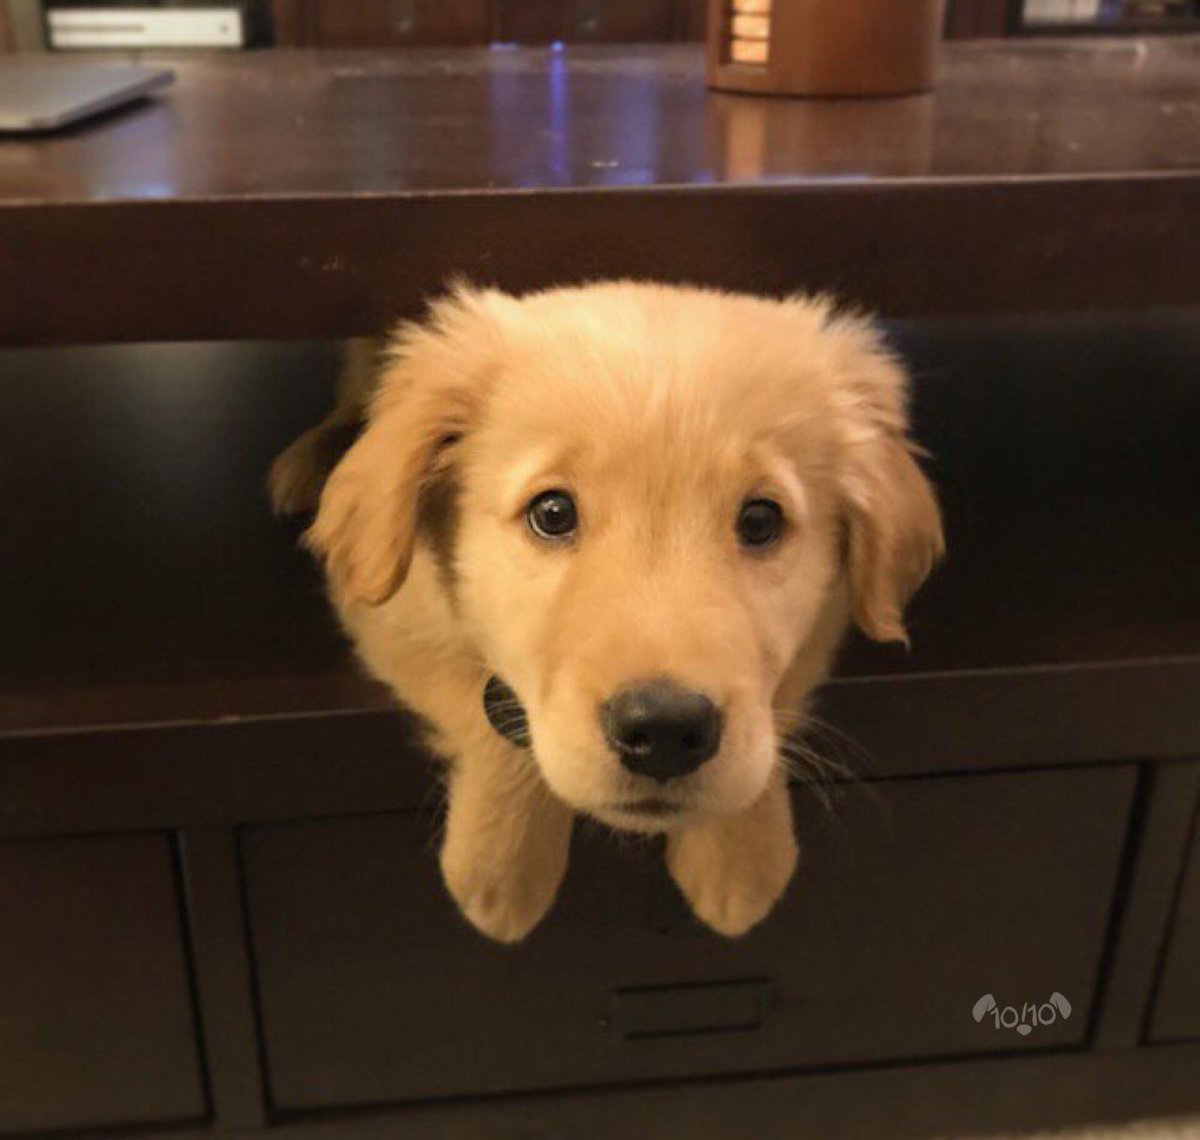

In [144]:
#First
url = golden_retriever_df.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

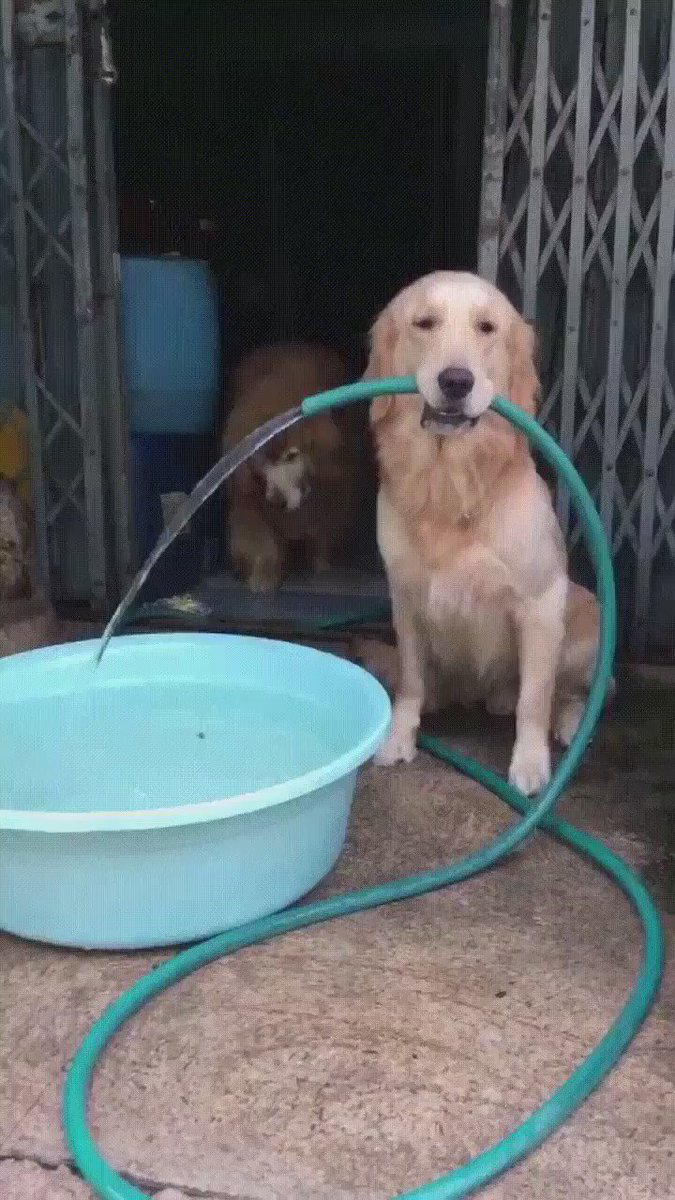

In [146]:
#Second
url = golden_retriever_df.jpg_url.iloc[1]
r = requests.get(url)
Image.open(BytesIO(r.content))

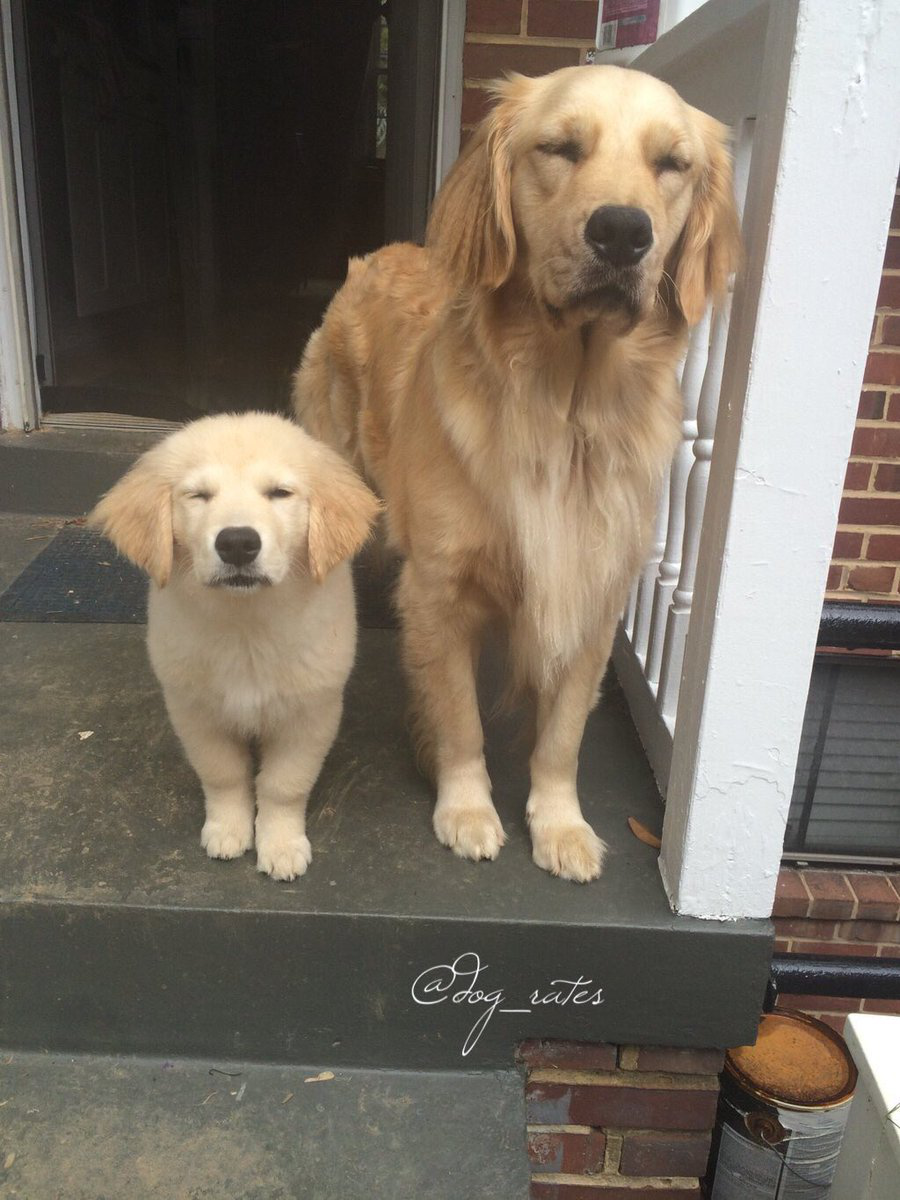

In [147]:
#Third
url = golden_retriever_df.jpg_url.iloc[2]
r = requests.get(url)
Image.open(BytesIO(r.content))

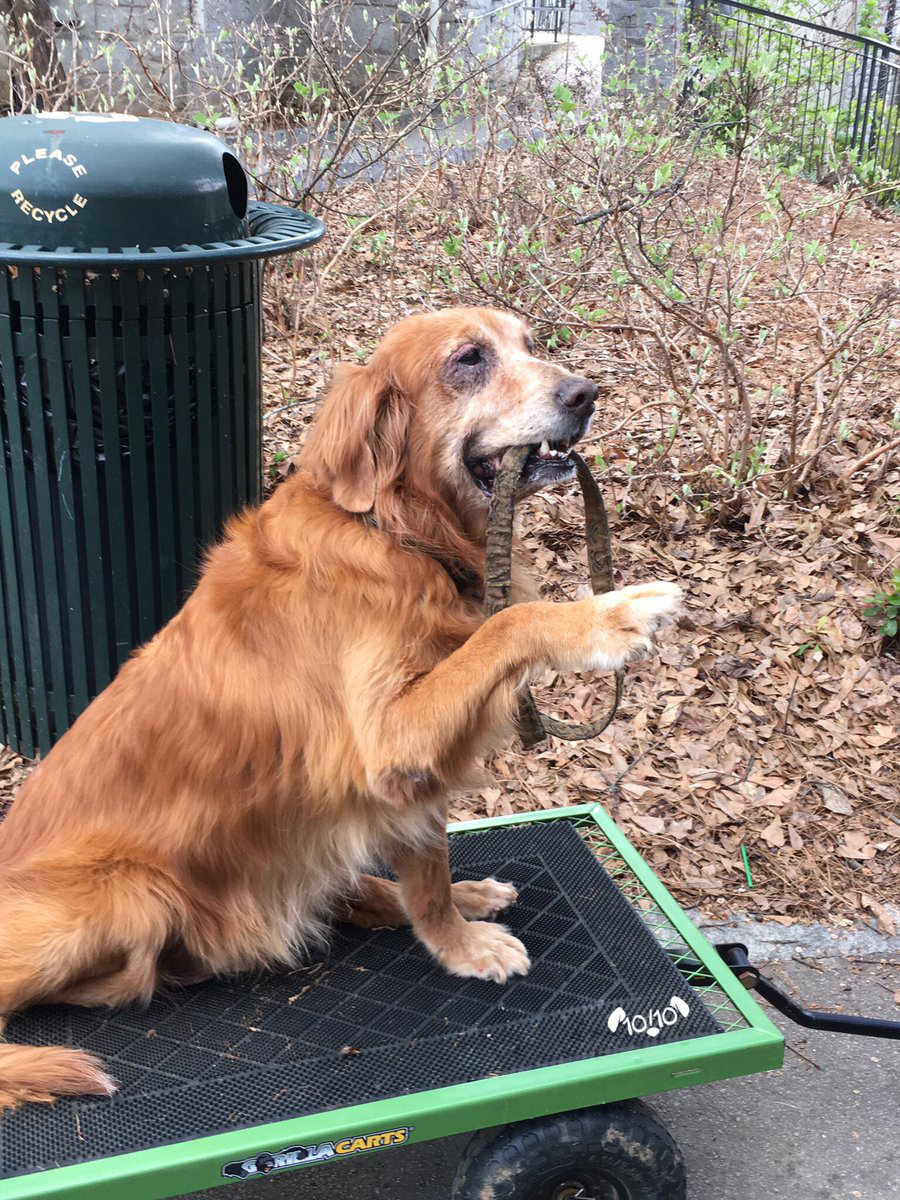

In [148]:
#Fourth
url = golden_retriever_df.jpg_url.iloc[3]
r = requests.get(url)
Image.open(BytesIO(r.content))

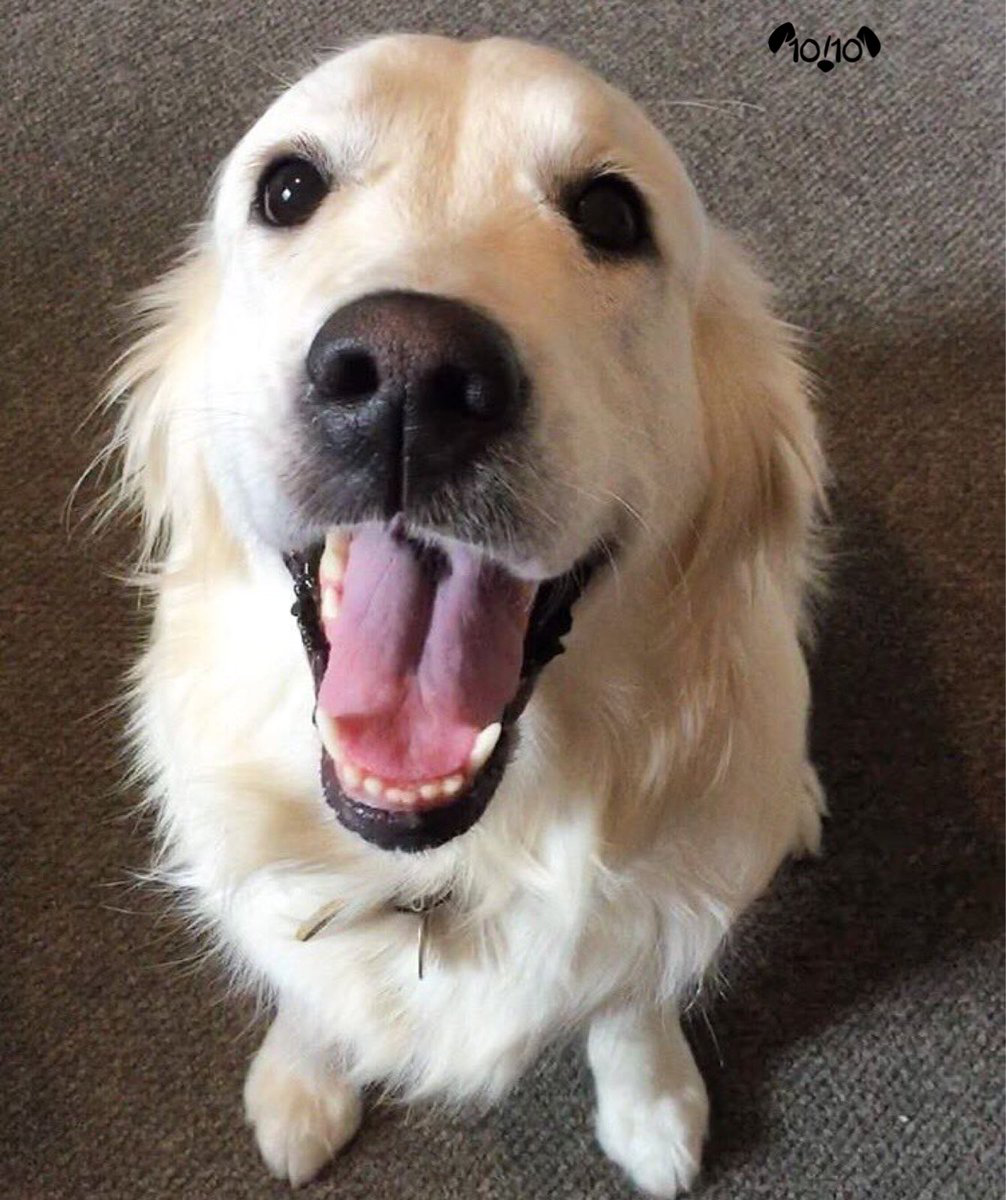

In [149]:
#Fifth
url = golden_retriever_df.jpg_url.iloc[4]
r = requests.get(url)
Image.open(BytesIO(r.content))

In [153]:
twitter.first_prediction.value_counts().head()

Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    55
Name: first_prediction, dtype: int64

  Insight: Analyzed Dog Breeds and found out that Golden Retriver is the tops the most popular dog breed. 

### Retweet Count, Favorite Count and Ratings

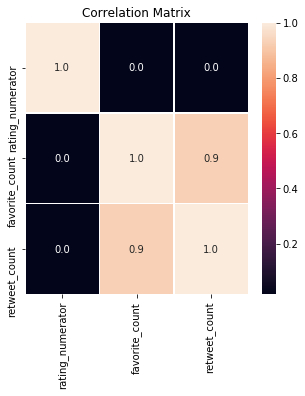

In [160]:
#Plotting correlation plot for Retweet Count, Favorite Count and Ratings to check relationships
f,ax = plt.subplots(figsize=(5, 5))
sb.heatmap(twitter[['rating_numerator', 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.title('Correlation Matrix');

<Figure size 576x576 with 0 Axes>

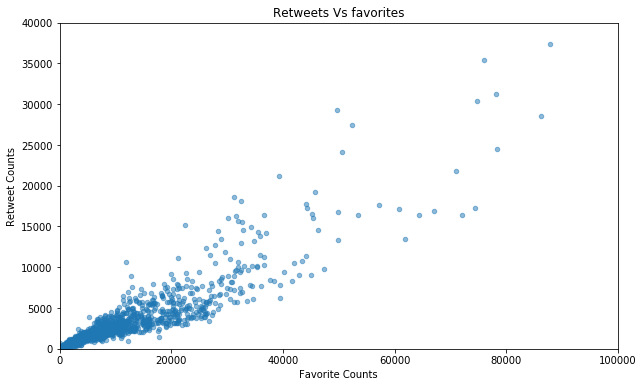

In [159]:
# favorite_count and retweet_count
plt.figure(figsize=(8,8))
twitter.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5)
plt.xlim((0,100000))
plt.ylim((0,40000))
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Counts')
plt.title('Retweets Vs favorites');

Insight: There is strong positive correlation between Favorites and retweets i.e a linear relationship between the retweet counts and the favorite counts. The regression coefficient for this relationship is strong (r= 0.9).

### Top 10 Dogs with Lowest Rating

In [176]:
df_dog_rating = twitter.groupby('first_prediction').count()

tweet_id  timestamp  text  rating_numerator  \
first_prediction                                                              
Acorn_squash                           2          2     2                 2   
Afghan_hound                           3          3     3                 3   
African_crocodile                      1          1     1                 1   
African_grey                           1          1     1                 1   
African_hunting_dog                    1          1     1                 1   
Agama                                  1          1     1                 1   
Airedale                              12         12    12                12   
Alp                                    1          1     1                 1   
American_black_bear                    1          1     1                 1   
American_staffordshire_terrier        13         13    13                13   

                                rating_denominator  name  stage  jpg_url  \
first_prediction                                                           
Acorn_squash                                     2     2      0        2   
Afghan_hound                                     3     3      0        3   
African_crocodile                                1     1      0        1   
African_grey                                     1     1      0        1   
African_hunting_dog                              1     1      0        1   
Agama                                            1     1      0        1   
Airedale                                        12    12      1       12   
Alp                                              1     1      1        1   
American_black_bear                              1     1      1        1   
American_staffordshire_terrier                  13    13      3       13   

                                img_num  first_confidence  first_dog  \
first_prediction                                                       
Acorn_squash                          2                 2          2   
Afghan_hound                          3                 3          3   
African_crocodile                     1                 1          1   
African_grey                          1                 1          1   
African_hunting_dog                   1                 1          1   
Agama                                 1                 1          1   
Airedale                             12                12         12   
Alp                                   1                 1          1   
American_black_bear                   1                 1          1   
American_staffordshire_terrier       13                13         13   

                                second_prediction  second_confidence  \
first_prediction                                                       
Acorn_squash                                    2                  2   
Afghan_hound                                    3                  3   
African_crocodile                               1                  1   
African_grey                                    1                  1   
African_hunting_dog                             1                  1   
Agama                                           1                  1   
Airedale                                       12                 12   
Alp                                             1                  1   
American_black_bear                             1                  1   
American_staffordshire_terrier                 13                 13   

                                second_dog  third_prediction  \
first_prediction                                               
Acorn_squash                             2                 2   
Afghan_hound                             3                 3   
African_crocodile                        1                 1   
African_grey                             1                 1   
African_hunting_dog                      1              

In [178]:
df_dog_rating['rating_numerator'].value_counts()

1      180
2       47
3       36
4       22
7       14
5       12
9        9
6        7
8        5
17       4
12       4
13       4
18       4
10       3
16       3
11       3
38       2
19       2
14       2
20       2
88       1
79       1
55       1
41       1
40       1
21       1
29       1
27       1
26       1
23       1
22       1
95       1
139      1
Name: rating_numerator, dtype: int64

In [177]:
df_dog_rating['rating_numerator'].sort_values().head(10)

first_prediction
Zebra              1
Espresso           1
Radio_telescope    1
Fiddler_crab       1
Fire_engine        1
Flamingo           1
Quilt              1
Fountain           1
Four-poster        1
Prayer_rug         1
Name: rating_numerator, dtype: int64

Insight: There are total 180 dogs with lowest rating of 1.